In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines

def compute_srocc(x, y):
    corr, p = np.abs(stats.spearmanr(x, y))
    return corr

# Enter you Data Path here

In [2]:
#### ENTER YOUR DATA PATHS HERE ####

results_dir = 'results' # PATH TO YOUR RESULTS DIRECTORY (containing main_metrics.csv, etc.)
reader_scores_path = '/Users/pmayankees/Documents/Stanford/RSL/Chaudhari_Lab/Perceptual_Loss/DFD_MR_Recon_Data/ReaderScores.csv' # PATH TO YOUR ReaderScores.csv 
fs_key_path = '/Users/pmayankees/Documents/Stanford/RSL/Chaudhari_Lab/Perceptual_Loss/DFD_MR_Recon_Data/FatSuppression_key.csv' # PATH TO YOUR FatSuppression_key.csv


####

# Load Main Metric Results

In [3]:
metrics_path = os.path.join(results_dir, 'main_metrics.csv')
metrics_df = pd.read_csv(metrics_path)
metrics_df.head()

,Acceleration,Method,ScanID,SSIM,PSNR,NRMSE,SSFD,LPIPS (VGG-16),LPIPS (AlexNet),VGG-16,DISTS,ResNet50 (ImageNet),ResNet50 (RadImageNet),ResNet50 (random)
0,2,UNet,1000017,0.812590,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345
1,2,UNet,1000026,0.792901,31.237972,0.120368,4.576751,0.169731,0.084494,2.145622,0.084106,0.000128,0.528269,0.018440
2,2,UNet,1000041,0.893749,32.659756,0.075414,2.735710,0.157185,0.070719,1.916435,0.095488,0.000122,0.724701,0.017374
3,2,UNet,1000071,0.897639,34.474800,0.077193,3.974738,0.175639,0.082614,2.114370,0.113245,0.000147,0.959953,0.014371
4,2,UNet,1000107,0.887864,32.893375,0.066867,2.029721,0.162458,0.057724,1.999220,0.100672,0.000124,0.814994,0.019123


# Load Reader Scores

In [4]:
rs_df = pd.read_csv(reader_scores_path)

mean_values = rs_df.groupby(['Acceleration', 'Method', 'ScanID'])[['Aliasing', 'Cartilage/Meniscus']].mean()
mean_rs_df = rs_df.drop(['Aliasing', 'Cartilage/Meniscus'], axis=1).merge(mean_values, on=['Acceleration', 'Method', 'ScanID'])

df = metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
df = df.dropna(axis=0)
df.head()

,Acceleration,Method,ScanID,SSIM,PSNR,NRMSE,SSFD,LPIPS (VGG-16),LPIPS (AlexNet),VGG-16,DISTS,ResNet50 (ImageNet),ResNet50 (RadImageNet),ResNet50 (random),Reader,Aliasing,Cartilage/Meniscus
0,2,UNet,1000017,0.81259,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345,A,6.6,6.8
1,2,UNet,1000017,0.81259,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345,B,6.6,6.8
2,2,UNet,1000017,0.81259,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345,C,6.6,6.8
3,2,UNet,1000017,0.81259,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345,D,6.6,6.8
4,2,UNet,1000017,0.81259,31.923672,0.141422,4.245724,0.167467,0.075505,2.126998,0.080665,0.000129,0.552824,0.019345,E,6.6,6.8


# Figure 2 - Metric Correlation Plots

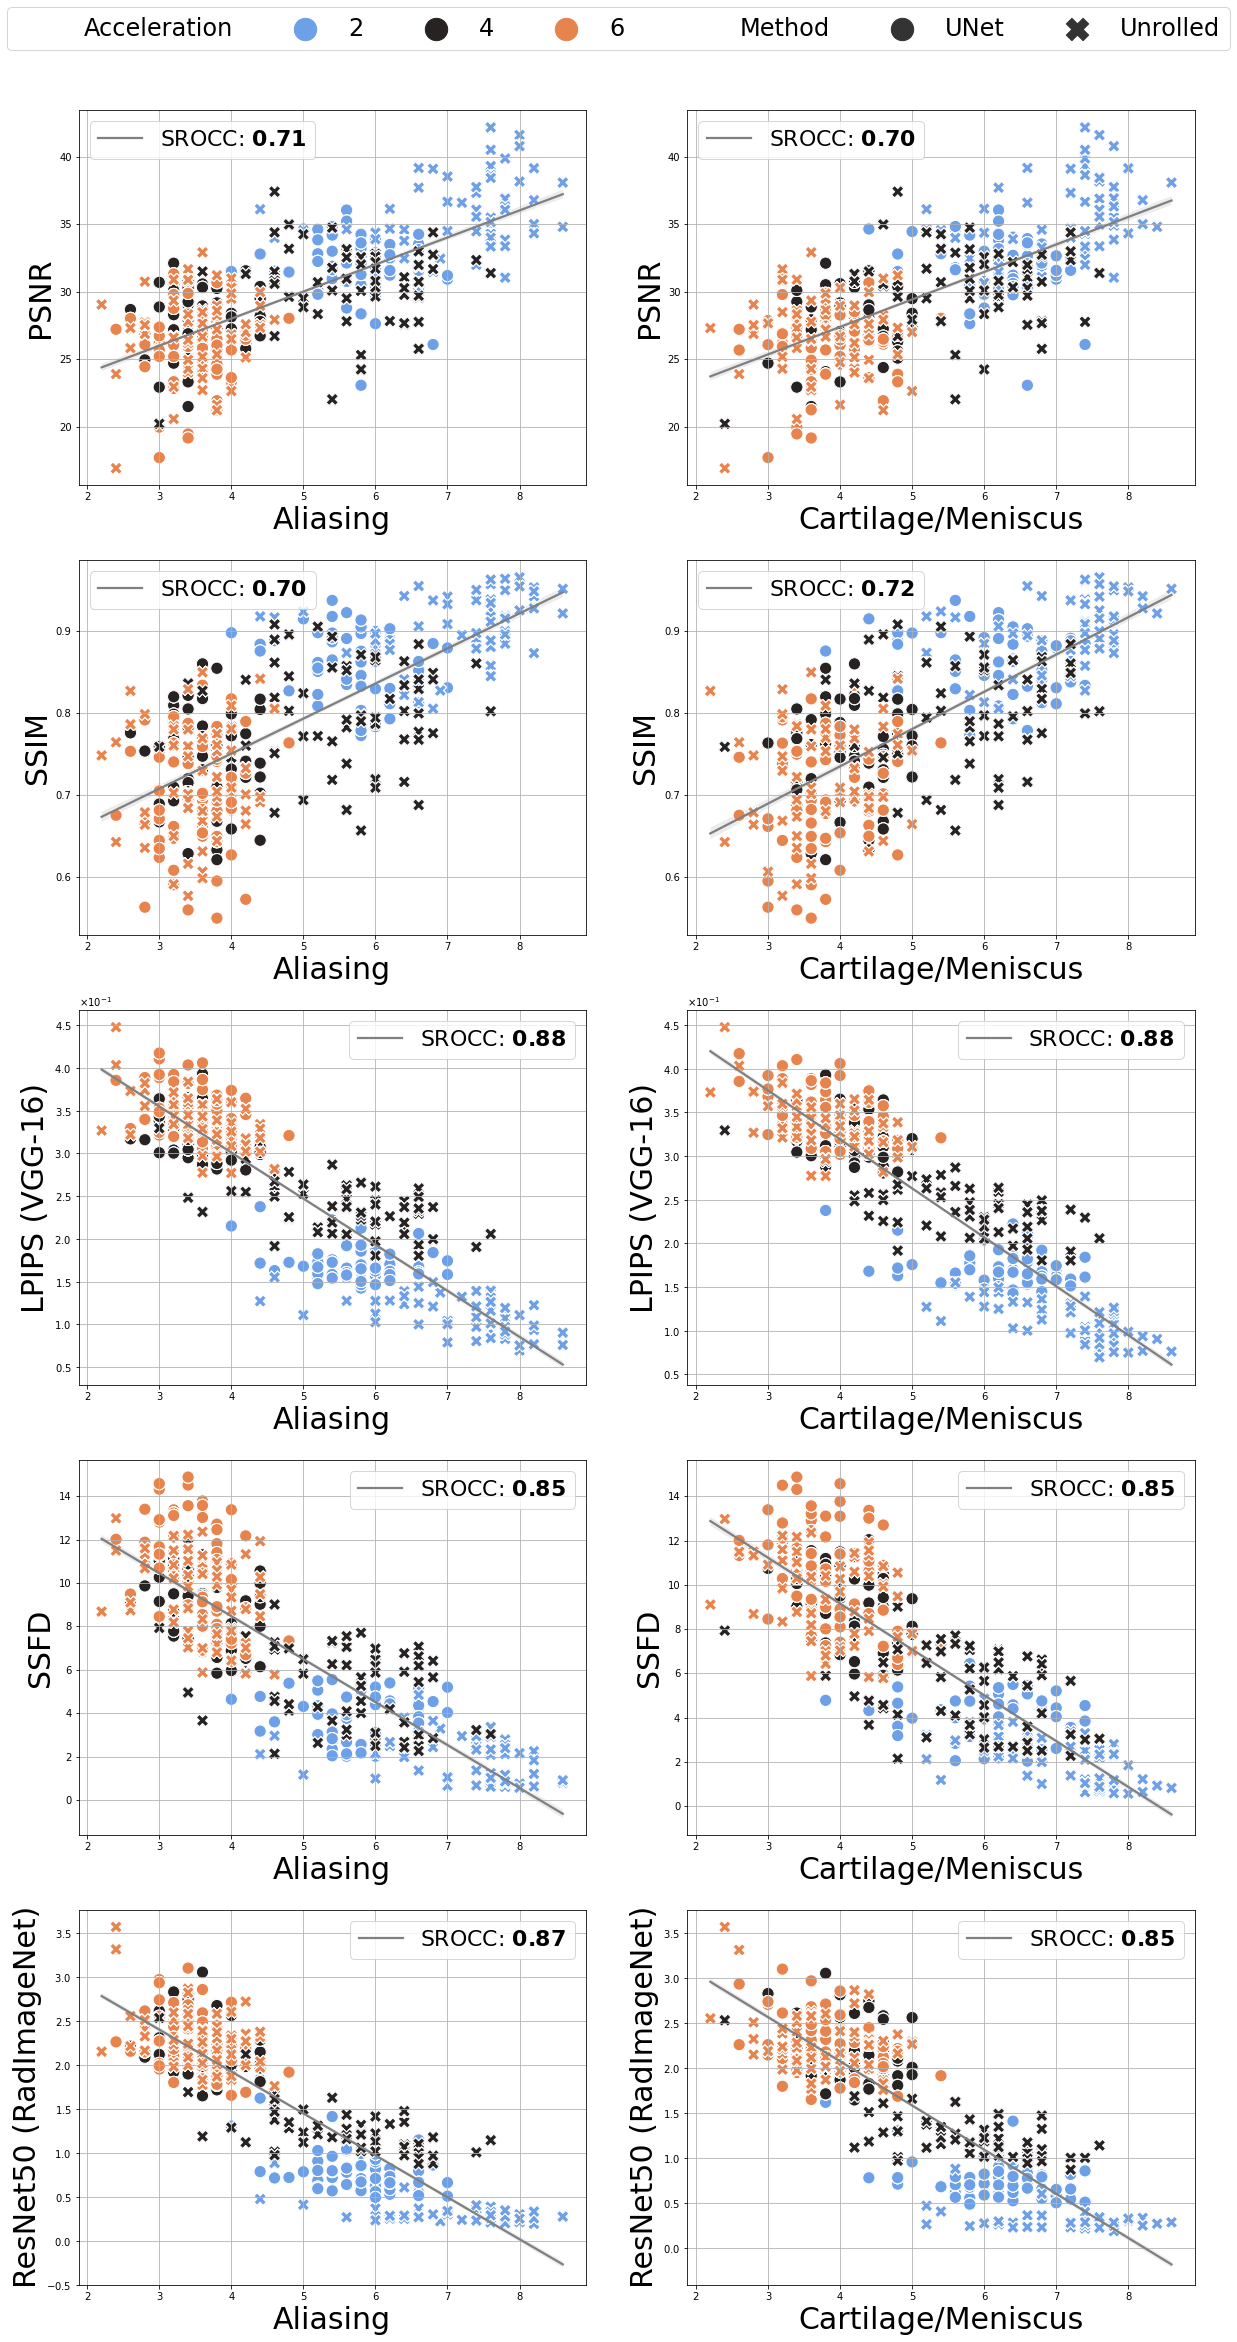

In [5]:
# ### ENTER METRICS HERE ####

# Figure 2
metrics = ['PSNR', 'SSIM', 'LPIPS (VGG-16)', 'SSFD', 'ResNet50 (RadImageNet)'] 

# All IQ metrics
# Note that the Med_VAEFD model has not yet been made publically available, and as such experiments were performed offline.
# metrics = ['PSNR', 'SSIM', 'NRMSE', 'SSFD', 'LPIPS (VGG-16)', 'LPIPS (AlexNet)', 'VGG-16', 'DISTS',  'ResNet50 (ImageNet)', 'ResNet50 (RadImageNet)', 'ResNet50 (random)'] 

########

scores = ["Aliasing","Cartilage/Meniscus"]

fig, axes = plt.subplots(len(metrics), 2, figsize=(20,len(metrics)*8))
axes = axes.ravel()
palette =sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

i = 0

for metric in metrics:
    for score in scores:
        srocc = compute_srocc(df[score], df[metric])
        sns.regplot(data=df, x=score, y=metric, scatter=False, color = 'grey', ci = 95, ax=axes[i])
        scatter = sns.scatterplot(x=score, y=metric, data = df, s= 150, ax=axes[i], hue = 'Acceleration', style = 'Method', palette = palette);
        axes[i].set_ylabel(metric, fontsize=30);
        axes[i].set_xlabel(score, fontsize=30);
        axes[i].legend([r'SROCC: $\mathbf{' + f'{np.abs(srocc):.2f}' + '}$'], fontsize=22)
        
        # Set the formatter for the y-axis to use scientific notation
        if metric not in ['SSIM', 'PSNR', 'SSFD']: 
            formatter = ScalarFormatter(useMathText=True)
            formatter.set_powerlimits((0,0))  # This will always use scientific notation
            axes[i].yaxis.set_major_formatter(formatter)

        axes[i].grid()
        i += 1
    
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


handles, labels = scatter.get_legend_handles_labels()
legend = fig.legend(handles, labels, title="", loc="upper center",bbox_to_anchor=(0.5, 0.92),ncol=7,fontsize=24)


for handle in legend.legendHandles:
    handle.set_sizes([500])  

# Figure S3 - Inter-reader Variability

In [6]:
rs_df['Aliasing_Mean'] = 0.0
rs_df['Cartilage/Meniscus_Mean'] = 0.0

# Calculate means excluding the current reader
for index, row in rs_df.iterrows():
    # Filter out the current reader
    temp_df = rs_df[(rs_df['ScanID'] == row['ScanID']) & 
                 (rs_df['Acceleration'] == row['Acceleration']) & 
                 (rs_df['Method'] == row['Method']) & 
                 (rs_df['Reader'] != row['Reader'])]
    
    aliasing_mean_exclude = temp_df['Aliasing'].mean()
    cartilage_meniscus_mean_exclude = temp_df['Cartilage/Meniscus'].mean()
    
    rs_df.at[index, 'Aliasing_Mean'] = aliasing_mean_exclude
    rs_df.at[index, 'Cartilage/Meniscus_Mean'] = cartilage_meniscus_mean_exclude


def generate_irv_df(df):
    readers = ['A', 'B', 'C', 'D', 'E']
    metrics = ['Aliasing', 'Cartilage/Meniscus']
    i = 0

    irv = []
    for metric in metrics:
        for j,reader in enumerate(readers):
            x_val = '%s_Mean'%(metric)
            y_val = metric
            df_temp = df[df['Reader']==reader]
            srocc = compute_srocc(df_temp[x_val], df_temp[y_val])
            irv.append({'metric':metric, 'reader':reader, 'srocc':srocc})
    irv_df = pd.DataFrame(irv)
    return irv_df

rs_irv_df = generate_irv_df(rs_df)

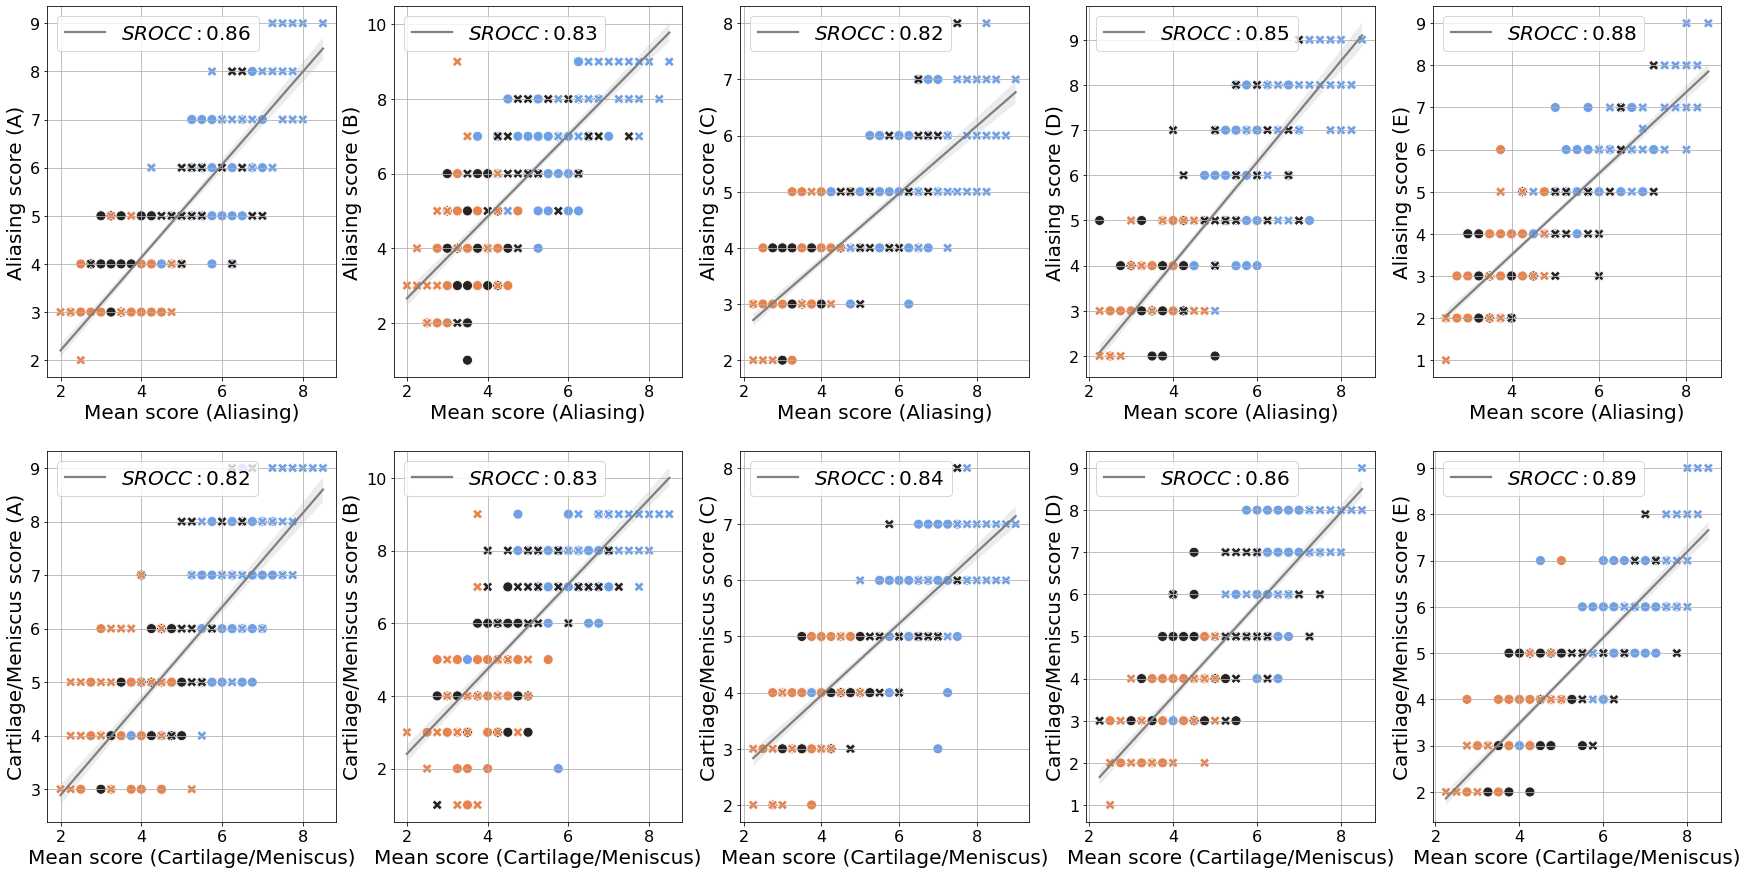

In [7]:
palette =sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

fig, axes = plt.subplots(2, 5, figsize=(30,15))
axes = axes.ravel()

readers = ['A', 'B', 'C', 'D', 'E']
metrics = ['Aliasing', 'Cartilage/Meniscus']
i = 0

for metric in metrics:
    for j,reader in enumerate(readers):
        x_val = '%s_Mean'%(metric)
        y_val = metric
        df_temp = rs_df[rs_df['Reader']==reader]
        srocc = compute_srocc(df_temp[x_val], df_temp[y_val])

        sns.regplot(data=df_temp, x=x_val, y=y_val, scatter=False, color = 'grey', ci = 95, ax=axes[i])
        sns.scatterplot(x=x_val, y=y_val, data = df_temp, s= 100, ax=axes[i], hue = 'Acceleration', style = 'Method', legend=False, palette = palette);

        axes[i].set_ylabel('%s score (%s)'%(metric,readers[j]), fontsize=20);
        axes[i].set_xlabel('Mean score (%s)'%metric, fontsize=20);
        axes[i].legend([ r'$SROCC:{0:.2f}$'.format(np.abs(srocc))], fontsize=20)
        axes[i].grid()
        i+=1

# Figure 3 - Metric SROCC barplot

In [8]:
metrics = ['PSNR', 'SSIM', 'NRMSE', 'SSFD', 'VGG-16', 'LPIPS (VGG-16)',  'LPIPS (AlexNet)', 'DISTS', 'ResNet50 (RadImageNet)', 'ResNet50 (ImageNet)', 'ResNet50 (random)']

scores = ["Aliasing","Cartilage/Meniscus"]

corr_data = []
for metric in metrics:
    for score in scores:
        srocc = compute_srocc(df[score], df[metric])
        data = {'metric':metric, 'score':score, 'srocc':srocc}
        corr_data.append(data)

# Manually add Med-VAEFD data as model not publically available, so experiment performed offline
corr_data.append({'metric':'Med-VAEFD', 'score':'Aliasing', 'srocc':0.85})   
corr_data.append({'metric':'Med-VAEFD', 'score':'Cartilage/Meniscus', 'srocc':0.85}) 
     
corr_df = pd.DataFrame(corr_data)

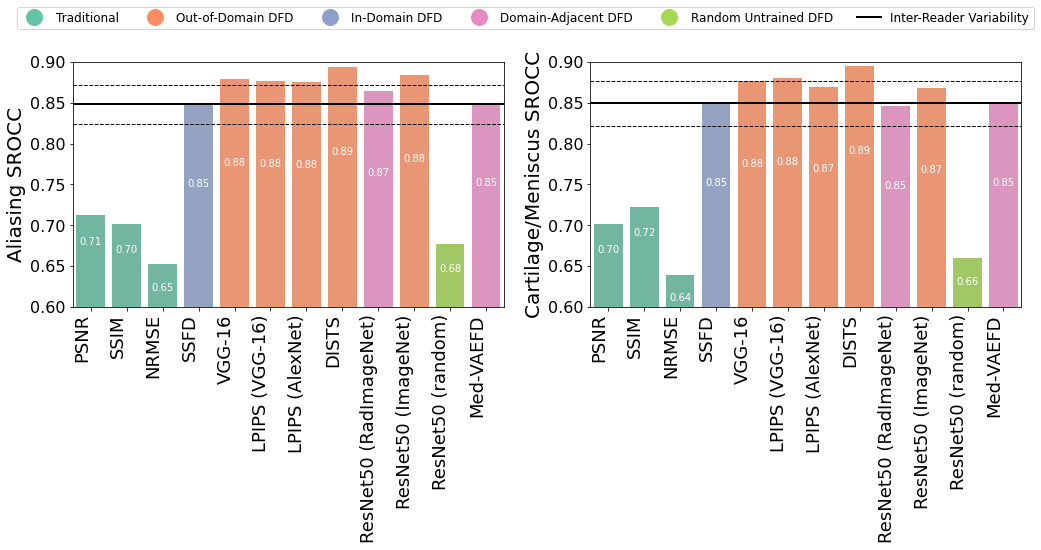

In [9]:
from matplotlib.lines import Line2D

def show_values(axs, space=.01):
    def _single(ax):
        for p in ax.patches:
            value = '{:.2f}'.format(p.get_height())
            _x = p.get_x() + p.get_width() / 2
            if float(value) >0.75:
                _y = p.get_y() + p.get_height() - (p.get_height()*0.12)
            else:
                _y = p.get_y() + p.get_height() - (p.get_height()*0.05)

            ax.text(_x, _y, value, ha="center",color="white") 
                

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

base_palette = sns.color_palette("Set2")

# Define a color mapping dictionary
category_color_mapping = {
    'Traditional': base_palette[0],
    'Out-of-Domain DFD': base_palette[1],
    'In-Domain DFD': base_palette[2],
    'Domain-Adjacent DFD': base_palette[3],
    'Random Untrained DFD': base_palette[4]

}

metric_color_mapping = {
    'SSIM': base_palette[0],
    'PSNR': base_palette[0],
    'NRMSE': base_palette[0],
    'SSFD': base_palette[2],
    'Med-VAEFD': base_palette[3],
    'VGG-16': base_palette[1],
    'LPIPS (VGG-16)': base_palette[1],
    'LPIPS (AlexNet)': base_palette[1],
    'DISTS': base_palette[1],
    'ResNet50 (ImageNet)': base_palette[1],
    'ResNet50 (RadImageNet)': base_palette[3],
    'ResNet50 (random)': base_palette[4],
}


fig, axes = plt.subplots(1,2, figsize=(17,5))

for j,score in enumerate(['Aliasing','Cartilage/Meniscus']):
    data = corr_df[(corr_df['score']==score)]
    mypalette=[metric_color_mapping.get(m, 'gray') for m in data['metric']]

    sns.barplot(data = data, x = 'metric',y='srocc',ax=axes[j],palette = mypalette)  
    axes[j].set_ylabel(score + ' SROCC', fontsize=20);
    axes[j].set_xlabel('', fontsize=1);
    axes[j].set_ylim([0.6,0.9])
    show_values(axes[j])

    axes[j].set_xticklabels(axes[j].get_xticklabels(), fontsize=18)  # Adjust the font size (e.g., fontsize=12)
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=16) 

    
    # Calculate mean and standard deviation for IRV
    temp_rs_irv_df = rs_irv_df[(rs_irv_df['metric'] == score)]
    mean_irv = temp_rs_irv_df['srocc'].mean()
    std_irv = temp_rs_irv_df['srocc'].std()

    # Plot the mean and standard deviation lines
    axes[j].axhline(mean_irv, color='black', linestyle='-', linewidth=2)  # Mean line
    axes[j].axhline(mean_irv - std_irv, color='black', linestyle='--', linewidth=1)  # Lower std dev
    axes[j].axhline(mean_irv + std_irv, color='black', linestyle='--', linewidth=1)  # Upper std dev


fig.autofmt_xdate(rotation=90)


legend_elements = []
# Create legend elements for the metrics
for metric, color in category_color_mapping.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=metric, markerfacecolor=color,markersize=18))
legend_elements.append(Line2D([0], [0], linestyle='-', linewidth=2, color = 'black',  label='Inter-Reader Variability'))

# Create the legend outside of the subplots at the top
legend = plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(-0.15, 1.25), ncol=6,fontsize=12)

# Figure 4 - Metric SROCC vs. acc. & recon type

In [10]:
core_metrics = ['PSNR', 'SSIM', 'LPIPS (VGG-16)', 'SSFD', 'ResNet50 (RadImageNet)']
scores = ["Aliasing","Cartilage/Meniscus"]

acc_data = []
model_data = []

for metric in core_metrics:
    for score in scores:
        for acc in [2,4,6]:
            df_slice = df[df['Acceleration']==acc]
            srocc = compute_srocc(df_slice[score], df_slice[metric])
            data = {'metric':metric, 'score':score, 'acc':acc,'srocc':srocc}
            acc_data.append(data)
            
        for method in ['UNet','Unrolled']:
            df_slice = df[df['Method']==method]
            srocc = compute_srocc(df_slice[score], df_slice[metric])
            data = {'metric':metric, 'score':score, 'method':method,'srocc':srocc}
            model_data.append(data)

        
acc_df = pd.DataFrame(acc_data)
model_df = pd.DataFrame(model_data)

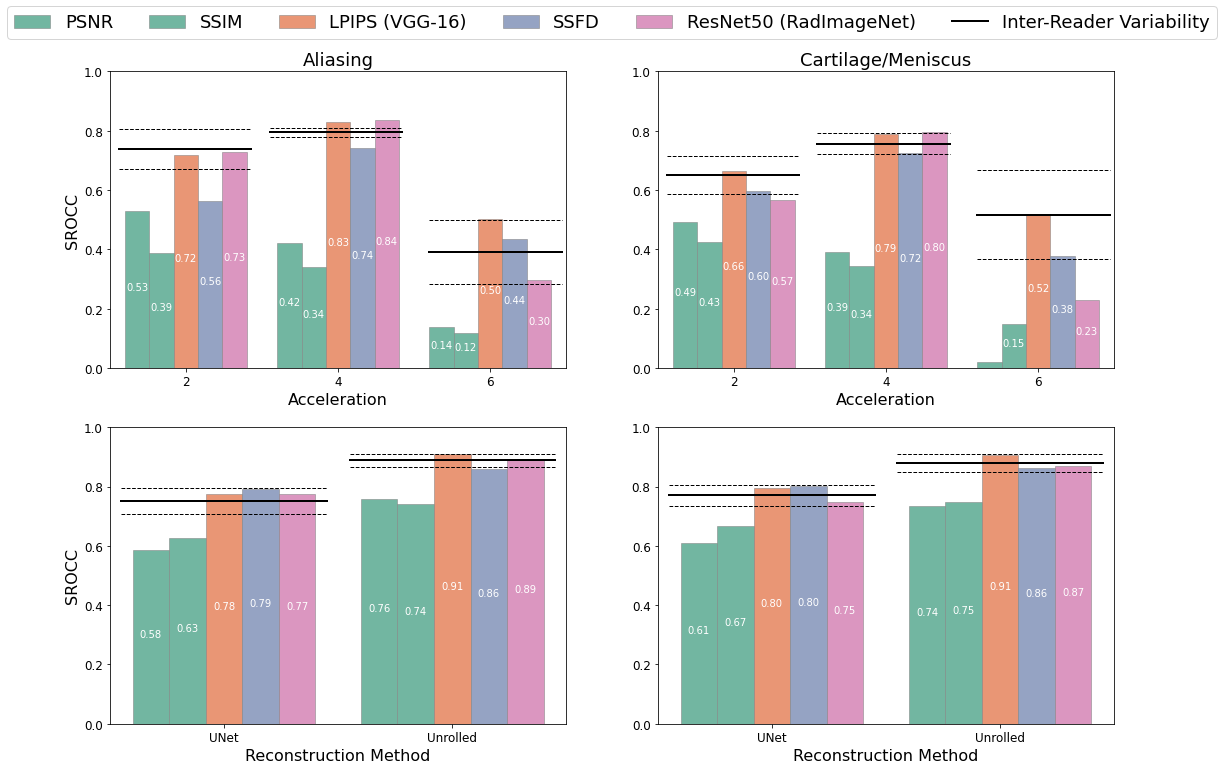

In [11]:
def show_values(axs, space=.01):
    def _single(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.2f}'.format(p.get_height())
            if float(value) > 0.1:
                ax.text(_x, _y, value, ha="center",color="white") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

base_palette = sns.color_palette("Set2")

metric_color_mapping = {
    'SSIM': base_palette[0],
    'PSNR': base_palette[0],
    'SSFD': base_palette[2],
    'LPIPS (VGG-16)': base_palette[1],
    'ResNet50 (RadImageNet)': base_palette[3],
}


fig, axes = plt.subplots(2, 2, figsize=(18,12))

for i,score in enumerate(scores):    
    data = acc_df[(acc_df['score']==score) & (acc_df['metric'].isin(core_metrics))]
    mypalette=[metric_color_mapping.get(m, 'gray') for m in data['metric'].unique()]
    barplot = sns.barplot(data = data, x = 'acc',y='srocc',hue = 'metric', ax=axes[0,i], palette = mypalette, edgecolor='gray', linewidth=0.5) 
    show_values(axes[0,i])
    
    # Set labels, title, and tick label sizes for the first row of plots
    axes[0, i].set_xlabel('Acceleration', fontsize=16)
    if i==0:
        axes[0, i].set_ylabel('SROCC', fontsize=16)
    else:
        axes[0, i].set_ylabel('', fontsize=1)
    axes[0, i].set_title(score, fontsize=18)
    axes[0, i].tick_params(labelsize=12)
    axes[0,i].set_ylim(0,1.0)

    handles, labels = axes[0, i].get_legend_handles_labels()
    
    # Calculate mean and standard deviation for IRV
    for pos, acc in zip([0.02, 0.35, 0.7],[2,4,6]):
        temp_rs_df = rs_df[rs_df['Acceleration']==acc]
        rs_irv_df = generate_irv_df(temp_rs_df)
        temp_rs_irv_df = rs_irv_df[(rs_irv_df['metric'] == score)]
        mean_irv = temp_rs_irv_df['srocc'].mean()
        std_irv = temp_rs_irv_df['srocc'].std()
        
        start_pos = pos
        end_pos = pos+0.29
        # Plot the mean and standard deviation lines
        axes[0,i].axhline(mean_irv, start_pos, end_pos, color='black', linestyle='-', linewidth=2)  # Mean line
        axes[0,i].axhline(mean_irv - std_irv, start_pos, end_pos, color='black', linestyle='--', linewidth=1)  # Lower std dev
        axes[0,i].axhline(mean_irv + std_irv, start_pos, end_pos, color='black', linestyle='--', linewidth=1)  # Upper std dev
    

        
    data = model_df[(model_df['score']==score) & (model_df['metric'].isin(core_metrics))]
    mypalette=[metric_color_mapping.get(m, 'gray') for m in data['metric'].unique()]
    barplot = sns.barplot(data = data, x = 'method',y='srocc',hue = 'metric', ax=axes[1,i], palette = mypalette, edgecolor='gray', linewidth=0.5) 
    show_values(axes[1,i])
    
    # Set labels, title, and tick label sizes for the second row of plots
    axes[1, i].set_xlabel('Reconstruction Method', fontsize=16)
    if i==0:
        axes[1, i].set_ylabel('SROCC', fontsize=16)
    else:
        axes[1, i].set_ylabel('', fontsize=1)
    axes[1, i].tick_params(labelsize=12)
    axes[1,i].set_ylim(0,1.0)
    
    # Calculate mean and standard deviation for IRV
    for pos, method in zip([0.025,0.525],['UNet','Unrolled']):
        temp_rs_df = rs_df[rs_df['Method']==method]
        rs_irv_df = generate_irv_df(temp_rs_df)
        temp_rs_irv_df = rs_irv_df[(rs_irv_df['metric'] == score)]
        mean_irv = temp_rs_irv_df['srocc'].mean()
        std_irv = temp_rs_irv_df['srocc'].std()
        
        start_pos = pos
        end_pos = pos+0.45
        # Plot the mean and standard deviation lines
        axes[1,i].axhline(mean_irv, start_pos, end_pos, color='black', linestyle='-', linewidth=2)  # Mean line
        axes[1,i].axhline(mean_irv - std_irv, start_pos, end_pos, color='black', linestyle='--', linewidth=1)  # Lower std dev
        axes[1,i].axhline(mean_irv + std_irv, start_pos, end_pos, color='black', linestyle='--', linewidth=1)  # Upper std dev
    

# Remove the legends from individual plots
for ax in axes.flat:
    ax.get_legend().remove()

# Create the legend outside of the subplots at the top
irv_handle = mlines.Line2D([], [], color='black', marker='_', markersize=15, label='IRV', linestyle='-', linewidth=2)
handles.append(irv_handle)
labels.append('Inter-Reader Variability')
legend = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.1, 2.45), ncol=6,fontsize=18)

# Table 1 -  Fat Suppression 

In [61]:
# merge in SSFD fat suppression specific encoder metrics
fs_metrics_path  = os.path.join(results_dir, 'ssfd_fs_metrics.csv')
fs_metrics_df = pd.read_csv(fs_metrics_path)

fs_df = fs_metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
fs_df = fs_df.dropna(axis=0)

fs_df.rename(columns={'SSFD':'SSFD (both)'},inplace=True)

fs_key_df = pd.read_csv(fs_key_path)
fs_df = fs_df.merge(fs_key_df, how = 'left')

# Compute FS subset specific correlations based on SSFD encoder training data and test set FS type.

fs_metrics = ['SSFD (both)', 'SSFD (FS)', 'SSFD (non-FS)']
scores = ["Aliasing","Cartilage/Meniscus"]


fs_data = []
for metric in fs_metrics:
    for score in scores:
        for fs in ['FS', 'non-FS']:
            df_slice = fs_df[fs_df['FS_type']==fs]
            srocc = compute_srocc(df_slice[score], df_slice[metric])
            data = {'metric':metric, 'score':score, 'Fat Suppression':fs,'srocc':srocc}
            fs_data.append(data)

fs_srocc_df = pd.DataFrame(fs_data)


# convert df to a more readable table format
fs_srocc_table = fs_srocc_df.pivot_table(index=['metric'], columns=['Fat Suppression', 'score'], values='srocc').round(2)
fs_srocc_table

Fat Suppression       FS                      non-FS                   
score           Aliasing Cartilage/Meniscus Aliasing Cartilage/Meniscus
metric                                                                 
SSFD (FS)           0.84               0.86     0.85               0.85
SSFD (both)         0.83               0.84     0.85               0.84
SSFD (non-FS)       0.82               0.83     0.85               0.85

# Table 2 -  SSFD Percent Training Data

In [56]:
# merge in SSFD percent training data specific encoder metrics
pct_metrics_path  = os.path.join(results_dir, 'ssfd_pct_data_metrics.csv')
pct_metrics_df = pd.read_csv(pct_metrics_path)

pct_df = pct_metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
pct_df = pct_df.dropna(axis=0)

# Compute reader score correlations based on SSFD encoder percent training data 
pct_metrics = ['SSFD (5 pct data)', 'SSFD (10 pct data)', 'SSFD (25 pct data)', 'SSFD (50 pct data)']
scores = ["Aliasing","Cartilage/Meniscus"]

pct_data = []
for metric in pct_metrics:
    for score in scores:
        srocc = compute_srocc(pct_df[score], pct_df[metric])
        data = {'metric':metric, 'score':score, 'srocc':srocc}
        pct_data.append(data)

pct_srocc_df = pd.DataFrame(pct_data)

# convert df to a more readable table format
pct_srocc_table = pct_srocc_df.pivot_table(index=['metric'],  columns = 'score', values='srocc').round(2)
pct_srocc_table

score,Aliasing,Cartilage/Meniscus
metric,,
SSFD (10 pct data),0.79,0.78
SSFD (25 pct data),0.78,0.78
SSFD (5 pct data),0.77,0.77
SSFD (50 pct data),0.83,0.81


# Table S1 -  SSFD SSL Pretext Task Design Choices

In [69]:
# merge in SSFD SSL pretext task specific encoder metrics
ssl_metrics_path  = os.path.join(results_dir, 'ssfd_hp_metrics.csv')
ssl_metrics_df = pd.read_csv(ssl_metrics_path)

ssl_df = ssl_metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
ssl_df = ssl_df.dropna(axis=0)
ssl_df.rename(columns={'SSFD (Patch Coverage 25)':'SSFD (baseline)'},inplace=True)

# Compute reader score correlations based on SSFD encoder percent training data 
ssl_metrics = ['SSFD (baseline)', 'SSFD (Patch Size 1)', 'SSFD (Patch Size 4)', 'SSFD (Patch Size 8)', 'SSFD (Patch Size 64)',
              'SSFD (Patch Coverage 10)',  'SSFD (Patch Coverage 50)',  'SSFD (Patch Coverage 75)']
scores = ["Aliasing","Cartilage/Meniscus"]

ssl_data = []
for metric in ssl_metrics:
    for score in scores:
        srocc = compute_srocc(ssl_df[score], ssl_df[metric])
        data = {'metric':metric, 'score':score, 'srocc':srocc}
        ssl_data.append(data)

ssl_srocc_df = pd.DataFrame(ssl_data)

# convert df to a more readable table format
ssl_srocc_table = ssl_srocc_df.pivot_table(index=['metric'],  columns = 'score', values='srocc').round(2)
ssl_srocc_table

score,Aliasing,Cartilage/Meniscus
metric,,
SSFD (Patch Coverage 10),0.84,0.83
SSFD (Patch Coverage 50),0.85,0.85
SSFD (Patch Coverage 75),0.84,0.83
SSFD (Patch Size 1),0.79,0.79
SSFD (Patch Size 4),0.78,0.77
SSFD (Patch Size 64),0.80,0.78
SSFD (Patch Size 8),0.74,0.73
SSFD (baseline),0.84,0.83


# Figure S4 -  SSFD Encoder Layer Design Choice

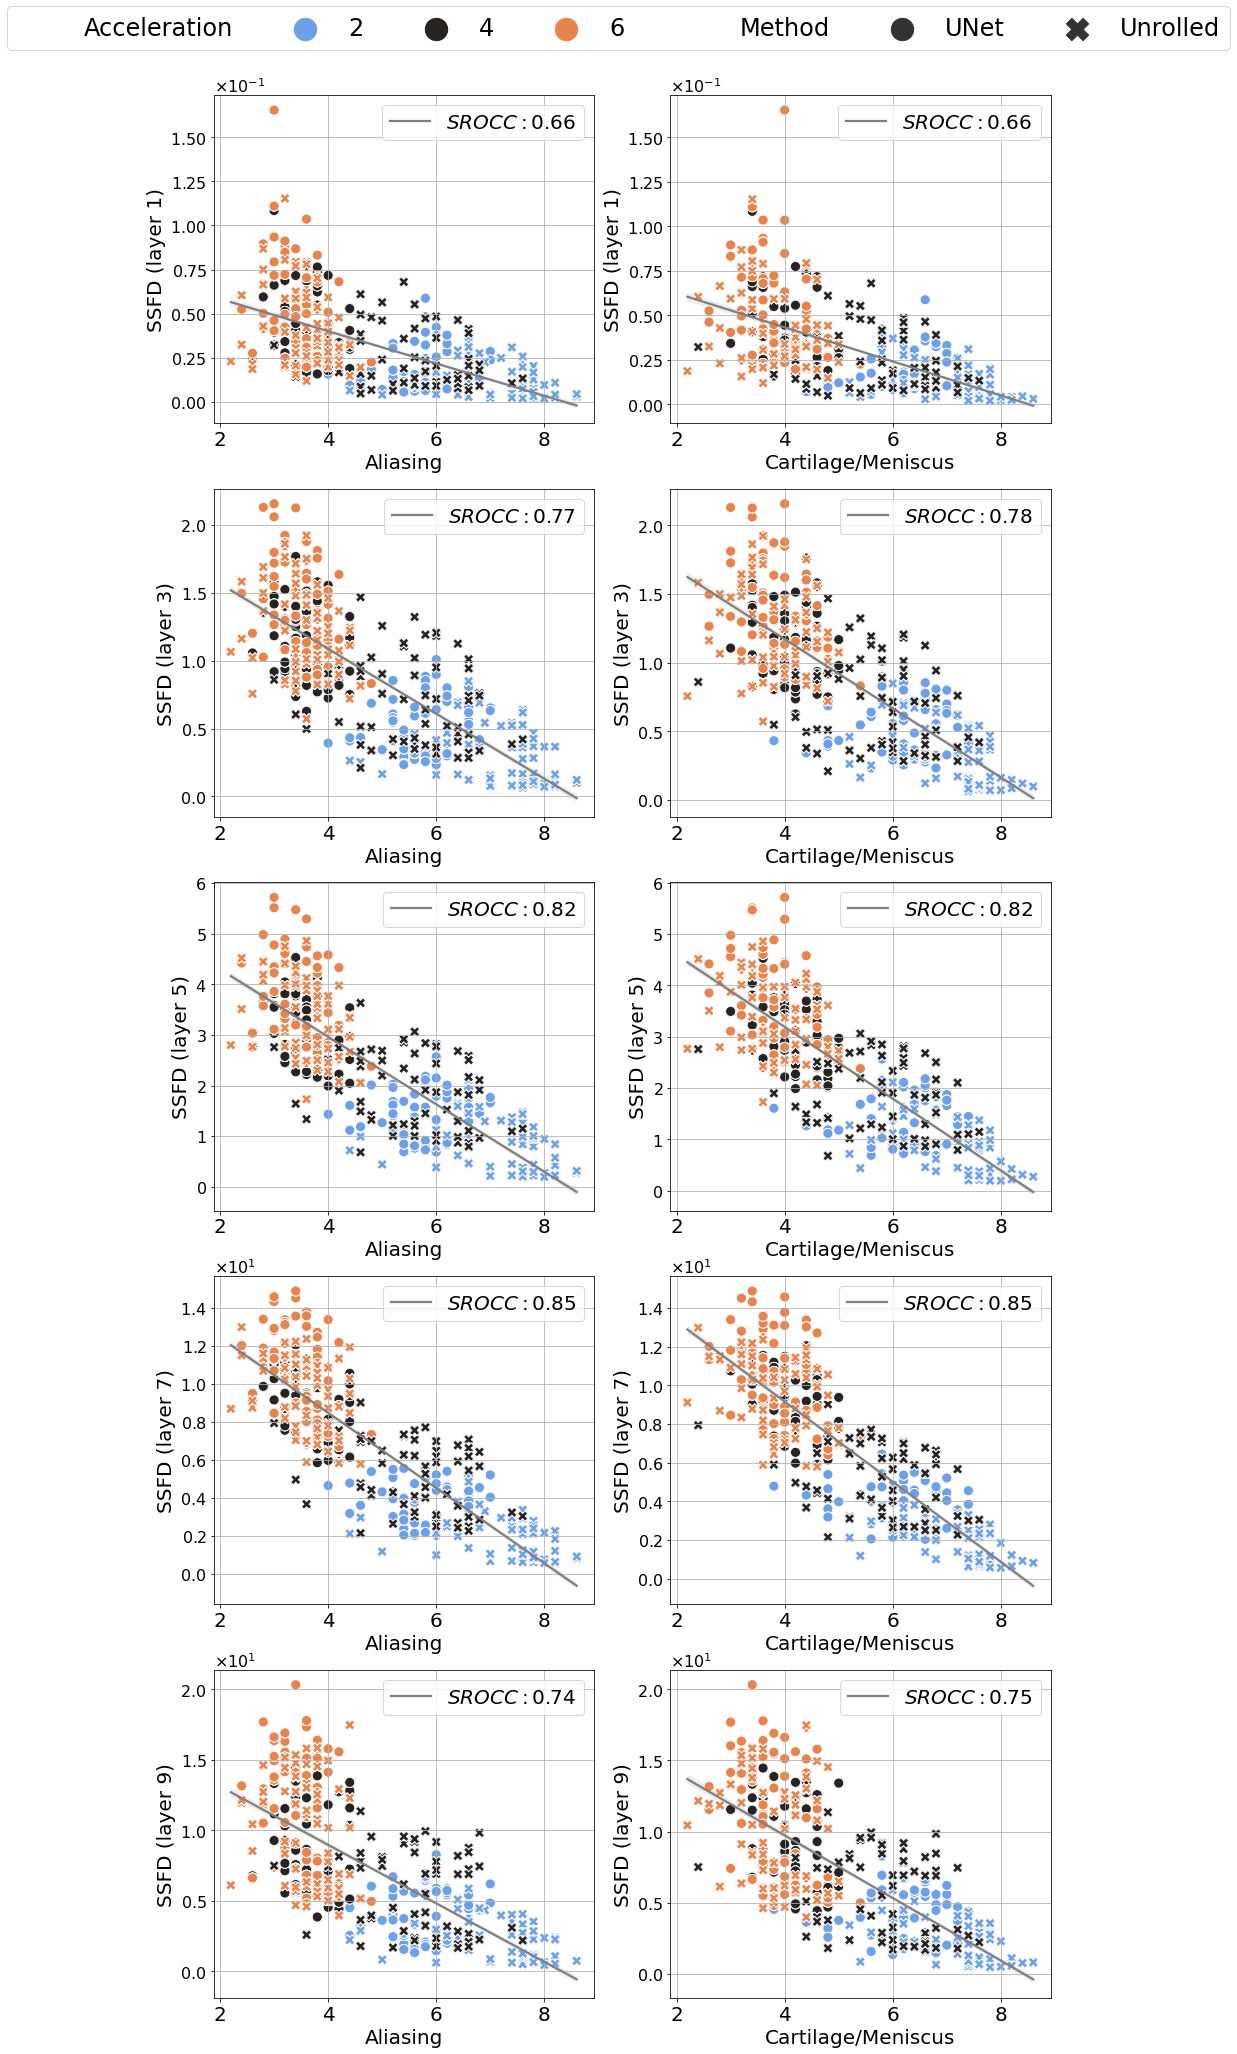

In [76]:
# merge in SSFD encoder layer metrics
layer_metrics_path  = os.path.join(results_dir, 'layer_metrics.csv')
layer_metrics_df = pd.read_csv(layer_metrics_path)

layer_df = layer_metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
layer_df = layer_df.dropna(axis=0)

# Plot SSFD vs. reader scores for each encoder layer
fig, axes = plt.subplots(5, 2, figsize=(15,35))
axes = axes.ravel()
palette =sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

scores = ['Aliasing', 'Cartilage/Meniscus']
layer_metrics = ['SSFD (layer 1)', 'SSFD (layer 3)', 'SSFD (layer 5)', 'SSFD (layer 7)', 'SSFD (layer 9)']

i = 0
for metric in layer_metrics:
    for score in scores:
        srocc = compute_srocc(layer_df[score], layer_df[metric])
        sns.regplot(data=layer_df, x=score, y=metric, scatter=False, color = 'grey', ci = 95, ax=axes[i])
        scatter = sns.scatterplot(x=score, y=metric, data = layer_df, s= 100, ax=axes[i], hue = 'Acceleration', style = 'Method', palette = palette);
        
        if metric not in ['SSIM', 'PSNR']: 
            formatter = ScalarFormatter(useMathText=True)
            formatter.set_powerlimits((0,0)) 
            axes[i].yaxis.set_major_formatter(formatter)


        axes[i].set_ylabel(metric, fontsize=20);
        axes[i].set_xlabel(score, fontsize=20);
        axes[i].legend([r'$SROCC:{0:.2f}$'.format(np.abs(srocc))], fontsize=20)
        axes[i].grid()
        i += 1
    
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


# Create a single legend outside of the subplots
handles, labels = scatter.get_legend_handles_labels()
legend = fig.legend(handles, labels, title="", loc="upper center",bbox_to_anchor=(0.5, 0.92),ncol=7,fontsize=24)

for handle in legend.legendHandles:
    handle.set_sizes([500])  # Adjust the marker size as needed

# Table S2 -  SSFD Distance Function Design Choice

In [ ]:
# merge in SSFD distance function choi e metrics
distance_metrics_path  = os.path.join(results_dir, 'ssfd_distance_metrics.csv')
distance_metrics_df = pd.read_csv(distance_metrics_path)

distance_df = distance_metrics_df.merge(mean_rs_df, how = 'outer', on = ['ScanID', 'Method', 'Acceleration'])
distance_df = distance_df.dropna(axis=0)

# Compute reader score correlations based on SSFD distance function
distance_metrics = ['SSFD (mse)', 'SSFD (mae)', 'SSFD (pdl)',  'SSFD (dists)']
scores = ["Aliasing","Cartilage/Meniscus"]

distance_data = []
for metric in distance_metrics:
    for score in scores:
        srocc = compute_srocc(distance_df[score], distance_df[metric])
        data = {'metric':metric, 'score':score, 'srocc':srocc}
        distance_data.append(data)

ssl_srocc_df = pd.DataFrame(distance_data)

# convert df to a more readable table format
ssl_srocc_table = ssl_srocc_df.pivot_table(index=['metric'],  columns = 'score', values='srocc').round(2)
ssl_srocc_table